In [1]:
import pandas as pd
import numpy as np

In [2]:
dt = pd.read_csv('googleplaystore.csv')

In [3]:
dt.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
dt.Size.unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

In [5]:
dt['Size'] = dt.Size.str.replace('M', 'e+3')
dt['Size'] = dt.Size.str.replace('k', 'e+6')

In [6]:
dt.Size.unique()

array(['19e+3', '14e+3', '8.7e+3', '25e+3', '2.8e+3', '5.6e+3', '29e+3',
       '33e+3', '3.1e+3', '28e+3', '12e+3', '20e+3', '21e+3', '37e+3',
       '2.7e+3', '5.5e+3', '17e+3', '39e+3', '31e+3', '4.2e+3', '7.0e+3',
       '23e+3', '6.0e+3', '6.1e+3', '4.6e+3', '9.2e+3', '5.2e+3', '11e+3',
       '24e+3', 'Varies with device', '9.4e+3', '15e+3', '10e+3',
       '1.2e+3', '26e+3', '8.0e+3', '7.9e+3', '56e+3', '57e+3', '35e+3',
       '54e+3', '201e+6', '3.6e+3', '5.7e+3', '8.6e+3', '2.4e+3', '27e+3',
       '2.5e+3', '16e+3', '3.4e+3', '8.9e+3', '3.9e+3', '2.9e+3', '38e+3',
       '32e+3', '5.4e+3', '18e+3', '1.1e+3', '2.2e+3', '4.5e+3', '9.8e+3',
       '52e+3', '9.0e+3', '6.7e+3', '30e+3', '2.6e+3', '7.1e+3', '3.7e+3',
       '22e+3', '7.4e+3', '6.4e+3', '3.2e+3', '8.2e+3', '9.9e+3',
       '4.9e+3', '9.5e+3', '5.0e+3', '5.9e+3', '13e+3', '73e+3', '6.8e+3',
       '3.5e+3', '4.0e+3', '2.3e+3', '7.2e+3', '2.1e+3', '42e+3',
       '7.3e+3', '9.1e+3', '55e+3', '23e+6', '6.5e+3', '1.5e+

In [7]:
def convert_it(y):
    try:
        float(y)
        return True
    except ValueError:
        return False

In [8]:
tmp = dt.Size.apply(lambda x: convert_it(x))
tmp.head()

0    True
1    True
2    True
3    True
4    True
Name: Size, dtype: bool

In [9]:
dt['Size'] = dt.Size.replace('Varies with device', np.nan)
dt['Size'] = dt.Size.replace('1,000+', 1000)
dt.Size.value_counts().head()

11e+3    198
12e+3    196
14e+3    194
13e+3    191
15e+3    184
Name: Size, dtype: int64

In [10]:
dt['Size'] = pd.to_numeric(dt['Size'])

In [11]:
dt.Size.head()

0    19000.0
1    14000.0
2     8700.0
3    25000.0
4     2800.0
Name: Size, dtype: float64

In [12]:
dt[~dt.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,1000.0,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [13]:
dt.Reviews.head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: object

In [14]:
dt = dt.drop(dt.index[10472])

In [15]:
dt[10471:].head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404000000.0,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4100.0,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up


In [16]:
dt['Reviews'] = pd.to_numeric(dt['Reviews'])

In [17]:
dt.Reviews.head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: int64

In [18]:
dt['Installs'] = dt.Installs.apply(lambda x: x.strip('+'))
dt.Installs.head()

0        10,000
1       500,000
2     5,000,000
3    50,000,000
4       100,000
Name: Installs, dtype: object

In [19]:
dt['Installs'] = dt.Installs.apply(lambda x: x.replace(',', ''))

In [20]:
dt.Installs.unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [21]:
dt['Installs'] = dt.Installs.replace('Free', np.nan)

In [22]:
dt['Installs'] = pd.to_numeric(dt['Installs'])
dt['Installs'] = dt['Installs'].astype('int')

In [23]:
dt.Installs.head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int32

In [24]:
dt.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [25]:
dt['Price'] = dt.Price.apply(lambda x: x.strip('$'))
dt['Price'] = dt.Price.replace('Everyone', np.nan)

In [26]:
dt.Price.unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [27]:
dt['Price'] = pd.to_numeric(dt['Price'])

In [28]:
dt.Price.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Price, dtype: float64

## Ratings

In [29]:
dt.dropna(axis=0, inplace=True)

In [30]:
print(dt['Rating'].min())
print(dt['Rating'].max())

1.0
5.0


In [31]:
print(dt['Reviews'].sum())
print(dt['Installs'].sum())

2277499336
65059096318


In [32]:
dt.Type.unique()

array(['Free', 'Paid'], dtype=object)

In [33]:
import plotly.express as px
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [35]:
px.histogram(dt, x ='Type', color = 'Price')

In [36]:
px.box(dt['Price'])

In [37]:
dt.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [38]:
dt.Reviews.value_counts().unique()

array([82, 77, 74, 72, 66, 62, 61, 55, 53, 45, 39, 37, 36, 32, 31, 29, 28,
       27, 26, 25, 23, 22, 21, 20, 19, 18, 17, 15, 14, 13, 12, 11, 10,  9,
        8,  7,  6,  5,  4,  3,  2,  1], dtype=int64)

In [39]:
px.histogram(dt['Reviews'])

## Price

### Creating a new dataframe by eliminating Price value more than 200, as price exceeding 200 can be fake or not genuine.

In [40]:
genuine = dt.Price.apply(lambda x: True if x < 200 else False)
dt[genuine].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [41]:
new_dt = dt[genuine]

In [42]:
new_dt.shape

(7708, 13)

In [43]:
dt.Reviews.unique()

array([   159,    967,  87510, ...,    603,   1195, 398307], dtype=int64)

In [44]:
dt.Reviews.head()

0       159
1       967
2     87510
3    215644
4       967
Name: Reviews, dtype: int64

In [45]:
rev = dt.Reviews.apply(lambda x: True if x < 2000000 else False)

In [46]:
dt[rev].shape

(7504, 13)

In [47]:
new_df = dt[rev]

In [48]:
new_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [49]:
new_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [50]:
px.box(new_df['Installs'])

In [51]:
data = new_df.Installs.apply(lambda x: True if x < 500000000 else False)
new_df[data].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [52]:
DATA = new_df[data]

In [53]:
DATA.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [54]:
print("10% of total number of installs in Installs column comes under", np.percentile(DATA['Installs'], 10))

10% of total number of installs in Installs column comes under 1000.0


In [55]:
print("25% of total number of installs in Installs column comes under",np.percentile(DATA['Installs'], 25))

25% of total number of installs in Installs column comes under 10000.0


In [56]:
print("50% of total number of installs in Installs column comes under", np.percentile(DATA['Installs'], 50))

50% of total number of installs in Installs column comes under 100000.0


In [57]:
print("70% of total number of installs in Installs column comes under", np.percentile(DATA['Installs'], 70))

70% of total number of installs in Installs column comes under 1000000.0


In [58]:
print("90% of total number of installs in Installs column comes under", np.percentile(DATA['Installs'], 90))

90% of total number of installs in Installs column comes under 10000000.0


In [59]:
print("95% of total number of installs in Installs column comes under", np.percentile(DATA['Installs'], 95))

95% of total number of installs in Installs column comes under 10000000.0


In [60]:
print("99% of total number of installs in Installs column comes under", np.percentile(DATA['Installs'], 99))

99% of total number of installs in Installs column comes under 50000000.0


<AxesSubplot:>

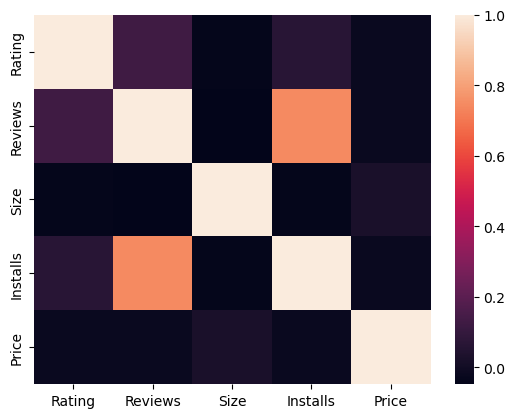

In [61]:
sns.heatmap(DATA.corr())

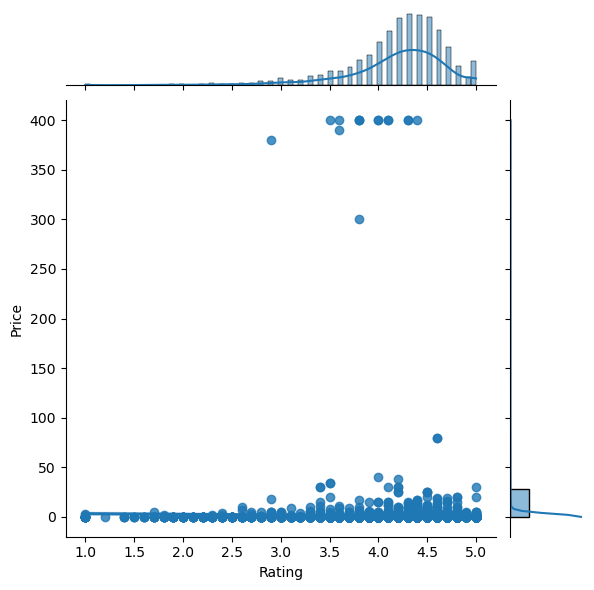

In [62]:
sns.jointplot(DATA['Rating'], DATA['Price'], kind='reg')

#### Inference: 
###### In the above graph we can see that the Rating & Price does not have a correlation.

In [63]:
DATA.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [64]:
DATA.Size.max()

994000000.0

In [65]:
px.box(DATA['Size'])

In [66]:
px.histogram(DATA, x = 'Rating', y = 'Reviews')

In [67]:
px.box(DATA, x = DATA['Rating'], color = DATA['Content Rating'])

In [68]:
px.box(DATA, x = 'Rating', color = 'Category')